In [1678]:
### Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import sklearn

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

In [1679]:
df_train = pd.read_csv("train_data.csv")
df_train = df_train.drop_duplicates(subset="CustomerId", keep="first")
df_train.reset_index(drop=True)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
22013,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
22014,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
22015,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


# 1. Nettoyage des Outliers

<Axes: xlabel='Age'>

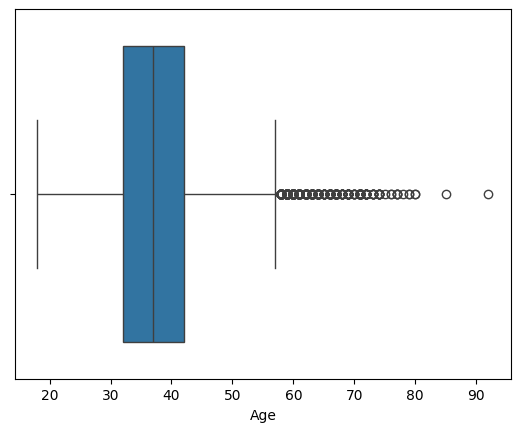

In [1680]:
# Pour la variable Age

sns.boxplot(x="Age", data=df_train)


In [1681]:
age = df_train["Age"]

q1 = age.quantile(0.25)
q3 = age.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_train.query("Age < @lower_bound | Age > @upper_bound")

#df_train = df_train.drop(outliers.index)

df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143463,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
143476,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
143499,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
143534,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


<Axes: xlabel='Balance'>

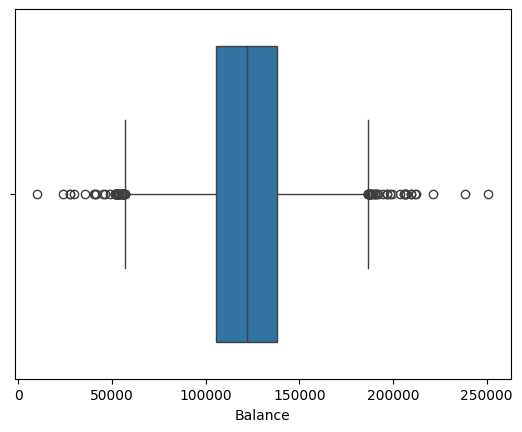

In [1682]:
# Pour la variable Balance

sns.boxplot(x="Balance", data=df_train.query("Balance > 0"))

In [1683]:
age = df_train.query("Balance > 0")["Balance"]

q1 = age.quantile(0.25)
q3 = age.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#outliers_balance = df_train.query("Balance < @lower_bound | Balance > @upper_bound")
outliers_balance = df_train.query("Balance > @upper_bound")

#df_train = df_train.drop(outliers_balance.index)

df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143463,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
143476,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
143499,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
143534,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


# 2. Encoding

In [1684]:
print(df_train.columns)


Index(['ID', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [1685]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit_transform(df_train[["Gender", "Geography"]])


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]], shape=(22017, 3))

## 3. Feature Engineering

1er idée : Créer une variable binaire pour les Balance = 0 et une autre BalancePositive pour les Balance > 0

# 3. Scaling (Normalisation)

In [1686]:
df_numeric = df_train[["Age", "Balance", "NumOfProducts"]]

scaler = StandardScaler()
scaler.fit(df_numeric)
df_standard = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)



In [1687]:
scaler = MinMaxScaler()
scaler.fit(df_numeric)
df_MinMax = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

In [1688]:
df_standard.describe()

,Age,Balance,NumOfProducts
count,2.201700e+04,2.201700e+04,2.201700e+04
mean,2.418821e-16,-9.681738e-18,3.227246e-17
std,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.283709e+00,-9.387422e-01,-9.963236e-01
25%,-6.923672e-01,-9.387422e-01,-9.963236e-01
50%,-1.240311e-01,-9.387422e-01,8.194248e-01
75%,4.443051e-01,9.856712e-01,8.194248e-01
max,6.127667e+00,3.033948e+00,4.450922e+00


In [1689]:
df_MinMax.describe()

,Age,Balance,NumOfProducts
count,22017.000000,22017.000000,22017.000000
mean,0.271502,0.236299,0.182904
std,0.118889,0.251724,0.183583
min,0.000000,0.000000,0.000000
25%,0.189189,0.000000,0.000000
50%,0.256757,0.000000,0.333333
75%,0.324324,0.484411,0.333333
max,1.000000,1.000000,1.000000


## Age

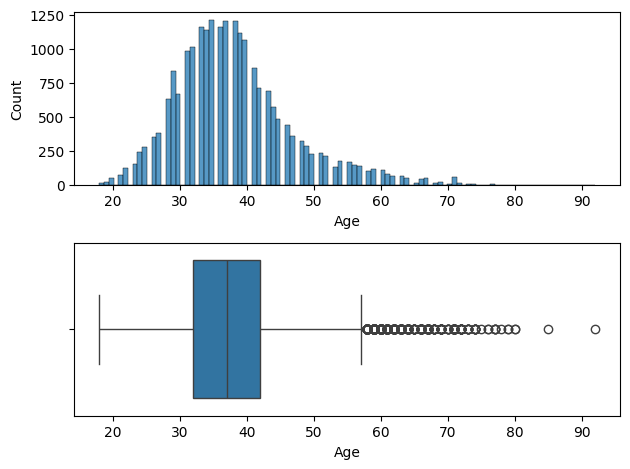

In [1690]:
# Age

fig, ax = plt.subplots(2,1)

sns.histplot(data = df_numeric, x="Age", ax=ax[0])
sns.boxplot(data=df_numeric, x="Age", ax=ax[1])
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Count'>

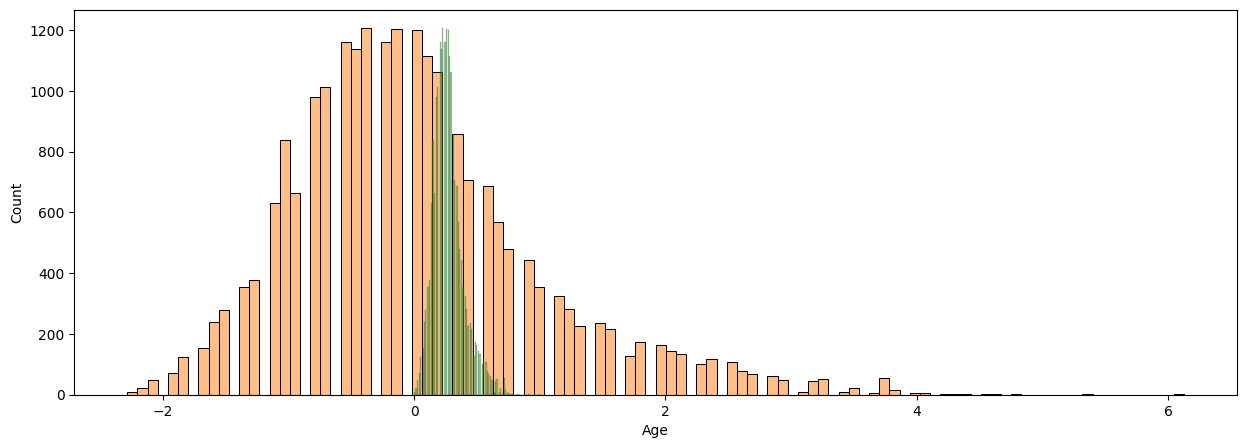

In [1691]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="Age", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard, x="Age", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax, x="Age", color="tab:green", alpha=0.5)

In [1692]:
df_standard.describe()

,Age,Balance,NumOfProducts
count,2.201700e+04,2.201700e+04,2.201700e+04
mean,2.418821e-16,-9.681738e-18,3.227246e-17
std,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.283709e+00,-9.387422e-01,-9.963236e-01
25%,-6.923672e-01,-9.387422e-01,-9.963236e-01
50%,-1.240311e-01,-9.387422e-01,8.194248e-01
75%,4.443051e-01,9.856712e-01,8.194248e-01
max,6.127667e+00,3.033948e+00,4.450922e+00


## Balance

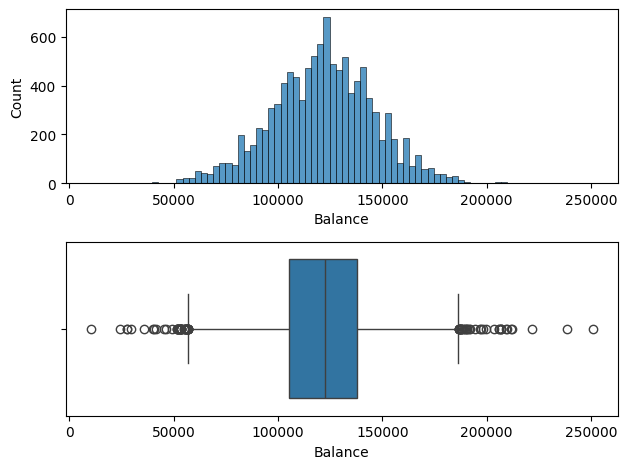

In [1693]:
fig, ax = plt.subplots(2,1)

sns.histplot(df_train.query("Balance > 0")["Balance"], ax=ax[0])
sns.boxplot(x="Balance", data=df_train.query("Balance > 0"), ax=ax[1])
plt.tight_layout()

<Axes: xlabel='Balance', ylabel='Count'>

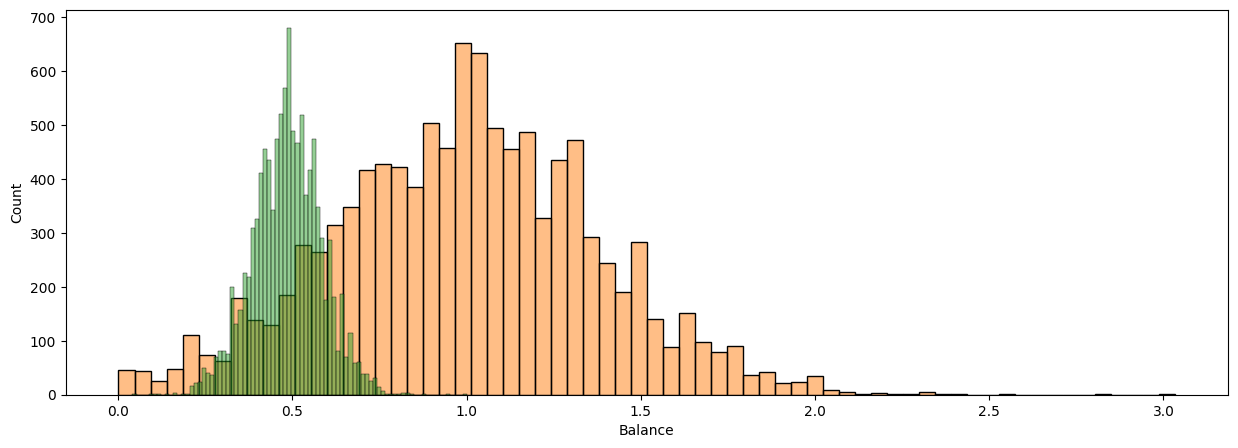

In [1694]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="Balance", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard.query("Balance > 0"), x="Balance", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax.query("Balance > 0"), x="Balance", color="tab:green", alpha=0.5)

## NumOfProducts

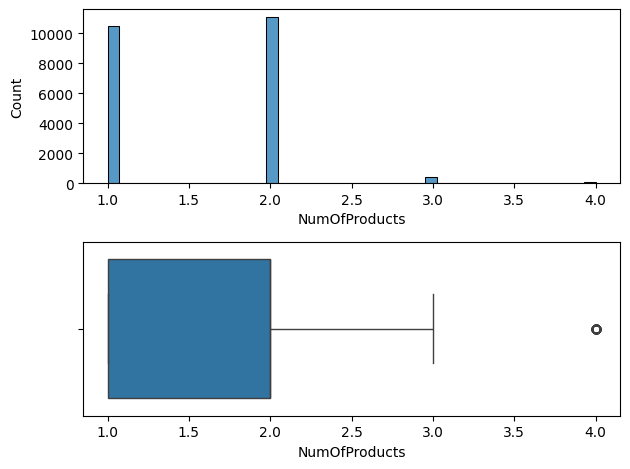

In [1695]:
fig, ax = plt.subplots(2,1)

sns.histplot(df_train["NumOfProducts"], ax=ax[0])
sns.boxplot(x="NumOfProducts", data=df_train, ax=ax[1])
plt.tight_layout()

<Axes: xlabel='NumOfProducts', ylabel='Count'>

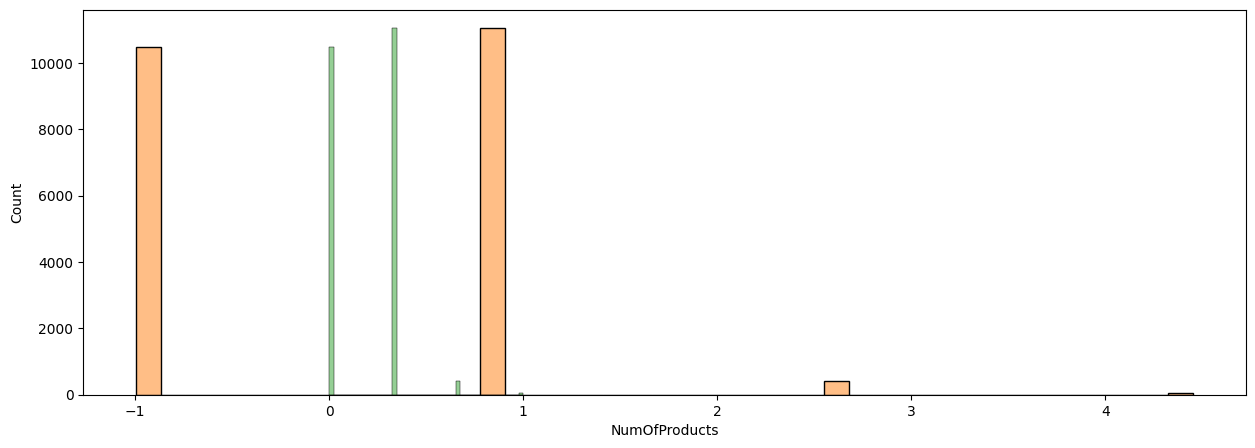

In [1696]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="NumOfProducts", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard, x="NumOfProducts", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax, x="NumOfProducts", color="tab:green", alpha=0.5)

# MODEL

In [1697]:
X = df_train.drop(columns=["Exited", "Surname", "CustomerId", "ID"])
y = df_train["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(17613, 10)
X_test.shape=(4404, 10)
y_train.shape=(17613,)
y_test.shape=(4404,)


In [1698]:
column_transformer = ColumnTransformer(transformers=[
    ("encoder", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"), ["Gender", "Geography"]),
    #("MinMax_scaler", MinMaxScaler(),["Age", "Balance", "Tenure", "EstimatedSalary", "CreditScore"]),
    #("Standard_scaler", StandardScaler(),["Age", "Balance", "CreditScore", "NumOfProducts", "EstimatedSalary", "Tenure"]),
], remainder="passthrough",force_int_remainder_cols=False)

model = pipeline = Pipeline(steps=[
    ("column_transformer", column_transformer),
    ("selectKbest", SelectKBest(k=7)),
    ("classifier", DecisionTreeClassifier(class_weight="balanced", random_state=42, max_depth=7))  # tu peux tester d'autres valeurs
])

model


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography'])])),
                ('selectKbest', SelectKBest(k=7)),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                                        random_state=42))])

In [1699]:
model.fit(X_train, y_train)

train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)


print(f"train_Accuracy : {train_accuracy:.4f}")
print(f"test_Accuracy : {test_accuracy:.4f}")

# F1-score
train_f1 = f1_score(y_train, train_prediction)
test_f1 = f1_score(y_train, train_prediction)

print(f"Train_F1-score : {train_f1:.4f}")
print(f"Test_F1-score : {test_f1:.4f}")

train_Accuracy : 0.8200
test_Accuracy : 0.8077
Train_F1-score : 0.6493
Test_F1-score : 0.6493


In [1700]:
param_grid = {
    "selectKbest__k": [1,2,3,4,5,6,7,8,9,10,11],
    "classifier__max_depth": [1,2,3,4, 5, 6, 7, 8, 9, 10, 11]
}

grid = GridSearchCV(model, param_grid, scoring="f1", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best score:", grid.best_score_)
print("Best params:", grid.best_params_)

Best score: 0.6236872037976064
Best params: {'classifier__max_depth': 7, 'selectKbest__k': 7}


# Evaluation par Validation Croisée:

In [1710]:
cv_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="f1",
)

print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

Scores de validation croisée : [0.61789474 0.62948647 0.62635482 0.61283186 0.63186813]
Moyenne des scores de validation croisée : 0.6236872037976064


# Recherche du meilleur Hyper-parametre max_depth

In [1711]:
k_scores = {}
for k in range(1, 12):
    model = pipeline = Pipeline(steps=[
        ("column_transformer", column_transformer),
        ("selectKbest", SelectKBest(k=k)),
        ("classifier", DecisionTreeClassifier(class_weight="balanced", random_state=42, max_depth=k)) 
    ])
    cv_scores = cross_val_score(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring="f1",
    )
    k_scores[k] = cv_scores.mean()

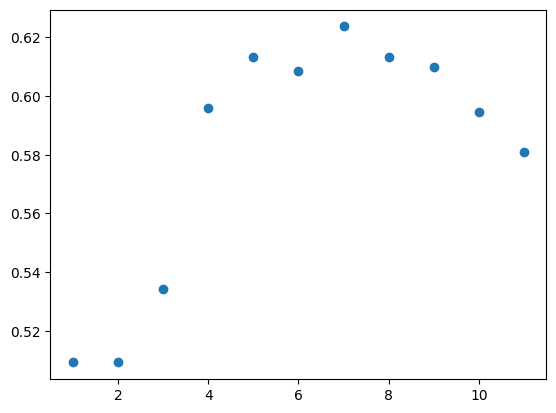

In [1712]:
plt.scatter(k_scores.keys(), k_scores.values())

# MAKE Predictions

In [1703]:
df = pd.read_csv("test_data.csv")
df

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,67897,15585246,Bancks,585,France,Female,53.0,2,0.00,2,1.0,1.0,91830.75
1,163075,15604551,Robb,606,France,Male,24.0,2,0.00,1,0.0,1.0,90876.95
2,134760,15729040,Ugochukwu,633,Germany,Male,44.0,1,118907.60,1,1.0,0.0,47777.15
3,68707,15792329,Hs?,602,Germany,Male,40.0,2,149961.99,2,1.0,1.0,82696.84
4,3428,15617166,Genovesi,645,France,Male,31.0,4,132351.29,1,1.0,0.0,151887.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21450,24790,15697574,Lucchese,685,France,Male,35.0,4,0.00,2,1.0,1.0,175072.47
21451,152608,15682708,Tuan,648,Spain,Female,47.0,3,0.00,1,1.0,0.0,156680.71
21452,28134,15614215,Ebelegbulam,607,France,Female,32.0,3,0.00,2,1.0,1.0,173599.38
21453,123871,15587573,Manna,705,France,Female,56.0,0,0.00,1,1.0,0.0,161479.19


In [1704]:
X_new = df[["Gender", "Geography", "Age", "Balance", "NumOfProducts", "IsActiveMember", "Tenure", "HasCrCard", "EstimatedSalary", "CreditScore"]]


In [1705]:
print(X_new.isnull().sum())


Gender             0
Geography          0
Age                0
Balance            0
NumOfProducts      0
IsActiveMember     0
Tenure             0
HasCrCard          0
EstimatedSalary    0
CreditScore        0
dtype: int64


In [1706]:
predictions = model.predict(X_new)

In [1707]:
predictions

array([0, 0, 1, ..., 0, 1, 0], shape=(21455,))

In [1708]:
results = pd.DataFrame(
    {
        "ID": df["ID"],
        "Exited": predictions
    }
)
results.set_index("ID")
    

,Exited
ID,
67897,0
163075,0
134760,1
68707,0
3428,0
...,...
24790,0
152608,1
28134,0


In [1709]:
results.to_csv("predictions.csv", index=False)